In [1]:
import importlib
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ensure project root on path so `src` is importable
sys.path.append(os.path.abspath(".."))

from src.data_loader import (
    list_available_years,
    load_raw_shots,
    clean_shots,
    save_clean,
    load_clean,
    get_player_shots,
)
import src.viz as viz
importlib.reload(viz)
from src.viz import (
    set_modern_style,
    plot_shot_chart_modern,
    plot_hexbin_frequency,
    plot_fg_prob_kde_modern,
    plot_kde_heatmap_modern,
)

set_modern_style()
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

available_years = list_available_years()
print("Available seasons:", available_years)
print("NOTE: coords auto-scale; FG% heatmap is smoothed KDE (not grid).")


Available seasons: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
NOTE: coords auto-scale; FG% heatmap is smoothed KDE (not grid).


In [2]:
# load all available seasons
years = available_years
print("Loading seasons:", years)

df_raw = load_raw_shots(years=years, n_rows=None)
print("Raw shape:", df_raw.shape)
df_raw.head()


Loading seasons: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2004_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2005_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2006_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2007_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2008_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2009_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2010_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2011_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2012_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-predictor/data/NBA_2013_Shots.csv ...
Loading /Users/lohithkola/Desktop/nba-shot-pre

SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID HOME_TEAM  \
0       Kobe Bryant              G       SG  04-14-2004  20301187       POR   
1  Damon Stoudamire              G       PG  04-14-2004  20301187       POR   
2       Kobe Bryant              G       SG  04-14-2004  20301187       POR   
3  Damon Stoudamire              G       PG  04-14-2004  20301187       POR   
4  Damon Stoudamire              G       PG  04-14-2004  20301187       POR   

  AWAY_TEAM   EVENT_TYPE  SHOT_MADE         ACTION_TYPE       SHOT_TYPE  \
0       LAL    Made Shot       True           Jump Shot  3PT Field Goal   
1       LAL    Made Shot       True  Driving Layup Shot  2PT Field Goal   
2       LAL  Missed Shot      False           Jump Shot  2PT Field Goal   
3       LAL    Made Shot       True           Jump Shot  2PT Field Goal   
4       LAL  Missed Shot      False           Jump Shot  2PT Field Goal   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE  LOC_X  \
0  Above the Break 3  Left Side Center       LC          24+ ft.   20.0   
1    Restricted Area            Center        C  Less Than 8 ft.   -0.0   
2          Mid-Range  Left Side Center       LC        16-24 ft.   13.3   
3          Mid-Range         Left Side        L        16-24 ft.   16.4   
4          Mid-Range        Right Side        R        16-24 ft.  -15.8   

   LOC_Y  SHOT_DISTANCE  QUARTER  MINS_LEFT  SECS_LEFT  YEAR  
0  21.35             25        6          0          0  2004  
1   5.25              0        6          0          2  2004  
2  24.45             23        6          0          9  2004  
3  13.95             18        6          0         31  2004  
4   7.85             16        6          0         55  2004

In [3]:
df_clean = clean_shots(df_raw)
print("Cleaned shape:", df_clean.shape)
print(f"Column count (raw -> clean): {len(df_raw.columns)} -> {len(df_clean.columns)}")

df_clean.head()

save_clean(df_clean)

df = load_clean()
print("Reloaded shape:", df.shape)
df.head(), df["YEAR"].value_counts().sort_index()


Cleaned shape: (4231262, 27)
Column count (raw -> clean): 27 -> 27
Reloaded shape: (4231262, 27)


(                TEAM_NAME       PLAYER_NAME  LOC_X  LOC_Y  SHOT_MADE_FLAG  \
 0      Los Angeles Lakers       Kobe Bryant   20.0  21.35               1   
 1  Portland Trail Blazers  Damon Stoudamire   -0.0   5.25               1   
 2      Los Angeles Lakers       Kobe Bryant   13.3  24.45               0   
 3  Portland Trail Blazers  Damon Stoudamire   16.4  13.95               1   
 4  Portland Trail Blazers  Damon Stoudamire  -15.8   7.85               0   
 
    SHOT_DISTANCE       SHOT_TYPE         ACTION_TYPE  YEAR  SEASON_1 SEASON_2  \
 0             25  3PT Field Goal           Jump Shot  2004      2004  2003-04   
 1              0  2PT Field Goal  Driving Layup Shot  2004      2004  2003-04   
 2             23  2PT Field Goal           Jump Shot  2004      2004  2003-04   
 3             18  2PT Field Goal           Jump Shot  2004      2004  2003-04   
 4             16  2PT Field Goal           Jump Shot  2004      2004  2003-04   
 
       TEAM_ID  PLAYER_ID POSITION_G

In [4]:
def summarize_dtypes(frame):
    return (
        frame.dtypes.astype(str)
        .value_counts()
        .rename_axis("dtype")
        .to_frame("column_count")
        .reset_index()
    )

raw_dtype_summary = summarize_dtypes(df_raw)
clean_dtype_summary = summarize_dtypes(df_clean)

print("Raw dtype coverage:")
display(raw_dtype_summary)

print("\nClean dtype coverage (should match raw coverage):")
display(clean_dtype_summary)

missing_dtypes = set(raw_dtype_summary["dtype"]) - set(clean_dtype_summary["dtype"])
if missing_dtypes:
    print("⚠️ Missing dtype(s) after cleaning:", missing_dtypes)
else:
    print("All raw dtypes preserved in cleaned data.")

print(f"Total columns preserved in cleaned data: {len(df_clean.columns)}")



Raw dtype coverage:


dtype  column_count
0   object            15
1    int64             9
2  float64             2
3     bool             1


Clean dtype coverage (should match raw coverage):


dtype  column_count
0   object            14
1    int64            10
2  float64             2
3     bool             1

All raw dtypes preserved in cleaned data.
Total columns preserved in cleaned data: 27


In [5]:
# Align rim to y=0 for small-range coords (no scaling)
max_abs = float(max(df["LOC_X"].abs().max(), df["LOC_Y"].abs().max()))
if max_abs < 30:
    print("Detected small coordinate range; centering rim at y=0")
    df["LOC_Y"] = df["LOC_Y"] - 5.25
    save_clean(df)
    print("Re-saved clean file with rim-centered coords")

print("Post-fix coord summary:")
print(df[["LOC_X", "LOC_Y"]].describe())


Post-fix coord summary:
              LOC_X         LOC_Y
count  4.231262e+06  4.231262e+06
mean   9.484016e-02  1.239007e+01
std    1.026536e+01  8.554501e+00
min   -2.500000e+01  5.000000e-02
25%   -2.900000e+00  5.875000e+00
50%   -0.000000e+00  8.050000e+00
75%    2.900000e+00  1.875000e+01
max    2.500000e+01  9.365000e+01


In [6]:
def search_players(df, substring, n=20):
    names = (
        df["PLAYER_NAME"]
        .dropna()
        .unique()
    )
    matches = [name for name in names if substring.lower() in name.lower()]
    return matches[:n]

players_by_attempts = (
    df.groupby("PLAYER_NAME")["SHOT_MADE_FLAG"].count()
    .sort_values(ascending=False)
)
players_by_attempts.head(20)


PLAYER_NAME
LeBron James         29311
Carmelo Anthony      22643
Russell Westbrook    20657
Kevin Durant         19875
Dirk Nowitzki        18286
DeMar DeRozan        18006
Kobe Bryant          17870
Dwyane Wade          17615
James Harden         17313
Stephen Curry        17095
LaMarcus Aldridge    16872
Chris Paul           16768
Joe Johnson          16340
Damian Lillard       15575
Jamal Crawford       15156
Vince Carter         15152
Zach Randolph        15152
Rudy Gay             14771
Tony Parker          14147
Paul George          13974
Name: SHOT_MADE_FLAG, dtype: int64

In [7]:
# --- selection ---
player = "Stephen Curry"  # change to any name from players_by_attempts.index
years_filter = None       # e.g., [2023, 2024] or None for all seasons

names = df["PLAYER_NAME"].dropna().unique().tolist()
matches = [n for n in names if n.lower() == player.lower()]
if matches:
    player = matches[0]
else:
    print(f"No exact match for '{player}'. Similar names: {search_players(df, player)}")

available_years_for_player = None
if years_filter is not None:
    available_years_for_player = sorted(
        {int(y) for y in years_filter} & set(df["YEAR"].unique())
    )
    if not available_years_for_player:
        print(f"No data for seasons {years_filter}; falling back to all seasons.")
        available_years_for_player = None

# --- player subset ---
df_p = get_player_shots(df, player_name=player, years=available_years_for_player)
if df_p.empty:
    raise ValueError(f"No shots found for {player} with current filters.")

player_total = len(df_p)
print(f"{player}: {player_total} shots across seasons {available_years_for_player or 'all'}")

season_counts = df_p["YEAR"].value_counts().sort_index()
season_fg = df_p.groupby("YEAR")["SHOT_MADE_FLAG"].mean().sort_index()
print("\nAttempts by season:\n", season_counts)
print("\nFG% by season:\n", season_fg.round(3))

# aggregated counts per season and action/shot type
action_counts = (
    df_p.groupby(["YEAR", "ACTION_TYPE"])
    .size()
    .reset_index(name="ATTEMPTS")
    .sort_values(["YEAR", "ATTEMPTS"], ascending=[True, False])
)
shot_counts = (
    df_p.groupby(["YEAR", "SHOT_TYPE"])
    .size()
    .reset_index(name="ATTEMPTS")
    .sort_values(["YEAR", "ATTEMPTS"], ascending=[True, False])
)

print("\nSample rows:")
df_p.head()


Stephen Curry: 17095 shots across seasons all

Attempts by season:
 YEAR
2010    1143
2011    1053
2012     296
2013    1388
2014    1383
2015    1341
2016    1596
2017    1442
2018     864
2019    1340
2020      82
2021    1365
2022    1224
2023    1133
2024    1445
Name: count, dtype: int64

FG% by season:
 YEAR
2010    0.462
2011    0.480
2012    0.490
2013    0.451
2014    0.471
2015    0.487
2016    0.504
2017    0.467
2018    0.495
2019    0.472
2020    0.402
2021    0.482
2022    0.437
2023    0.493
2024    0.450
Name: SHOT_MADE_FLAG, dtype: float64

Sample rows:


TEAM_NAME    PLAYER_NAME  LOC_X  LOC_Y  SHOT_MADE_FLAG  \
0  Golden State Warriors  Stephen Curry  -13.6   9.75               1   
1  Golden State Warriors  Stephen Curry    4.9  29.45               1   
2  Golden State Warriors  Stephen Curry   12.2   8.35               1   
3  Golden State Warriors  Stephen Curry   11.7   8.65               0   
4  Golden State Warriors  Stephen Curry   -0.0   5.25               1   

   SHOT_DISTANCE       SHOT_TYPE ACTION_TYPE  YEAR  SEASON_1 SEASON_2  \
0             14  2PT Field Goal   Jump Shot  2010      2010  2009-10   
1             24  3PT Field Goal   Jump Shot  2010      2010  2009-10   
2             12  2PT Field Goal   Jump Shot  2010      2010  2009-10   
3             12  2PT Field Goal   Jump Shot  2010      2010  2009-10   
4              0  2PT Field Goal  Layup Shot  2010      2010  2009-10   

      TEAM_ID  PLAYER_ID POSITION_GROUP POSITION   GAME_DATE   GAME_ID  \
0  1610612744     201939              G       PG  04-14-2010  20901229   
1  1610612744     201939              G       PG  04-14-2010  20901229   
2  1610612744     201939              G       PG  04-14-2010  20901229   
3  1610612744     201939              G       PG  04-14-2010  20901229   
4  1610612744     201939              G       PG  04-14-2010  20901229   

  HOME_TEAM AWAY_TEAM  SHOT_MADE         BASIC_ZONE   ZONE_NAME ZONE_ABB  \
0       POR       GSW       True          Mid-Range  Right Side        R   
1       POR       GSW       True  Above the Break 3      Center        C   
2       POR       GSW       True          Mid-Range   Left Side        L   
3       POR       GSW      False          Mid-Range   Left Side        L   
4       POR       GSW       True    Restricted Area      Center        C   

        ZONE_RANGE  QUARTER  MINS_LEFT  SECS_LEFT  
0         8-16 ft.        4          1         49  
1          24+ ft.        4          2         46  
2         8-16 ft.        4          3         19  
3         8-16 ft.        4          5         12  
4  Less Than 8 ft.        4          5         57

Action type attempts (top 20 rows):


YEAR                     ACTION_TYPE  ATTEMPTS
11  2010                       Jump Shot       620
14  2010                Pullup Jump shot       154
12  2010                      Layup Shot        96
2   2010              Driving Layup Shot        70
21  2010             Step Back Jump shot        55
7   2010              Floating Jump shot        40
1   2010  Driving Finger Roll Layup Shot        21
18  2010               Running Jump Shot        18
3   2010      Driving Reverse Layup Shot        10
15  2010              Reverse Layup Shot        10
24  2010            Turnaround Jump Shot        10
9   2010                  Jump Bank Shot         8
5   2010              Fadeaway Jump Shot         6
17  2010               Running Hook Shot         6
19  2010              Running Layup Shot         4
16  2010               Running Bank shot         3
22  2010                        Tip Shot         3
23  2010            Turnaround Bank shot         2
0   2010          Driving Bank Hook Shot         1
4   2010              Fadeaway Bank shot         1

Shot type attempts (top 20 rows):


YEAR       SHOT_TYPE  ATTEMPTS
0   2010  2PT Field Goal       763
1   2010  3PT Field Goal       380
2   2011  2PT Field Goal       711
3   2011  3PT Field Goal       342
4   2012  2PT Field Goal       175
5   2012  3PT Field Goal       121
6   2013  2PT Field Goal       788
7   2013  3PT Field Goal       600
8   2014  2PT Field Goal       768
9   2014  3PT Field Goal       615
10  2015  2PT Field Goal       695
11  2015  3PT Field Goal       646
13  2016  3PT Field Goal       884
12  2016  2PT Field Goal       712
15  2017  3PT Field Goal       788
14  2017  2PT Field Goal       654
17  2018  3PT Field Goal       501
16  2018  2PT Field Goal       363
19  2019  3PT Field Goal       810
18  2019  2PT Field Goal       530

/var/folders/w4/pkr6vk056pn38g4cqk9pjkh00000gn/T/ipykernel_98613/2152293255.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


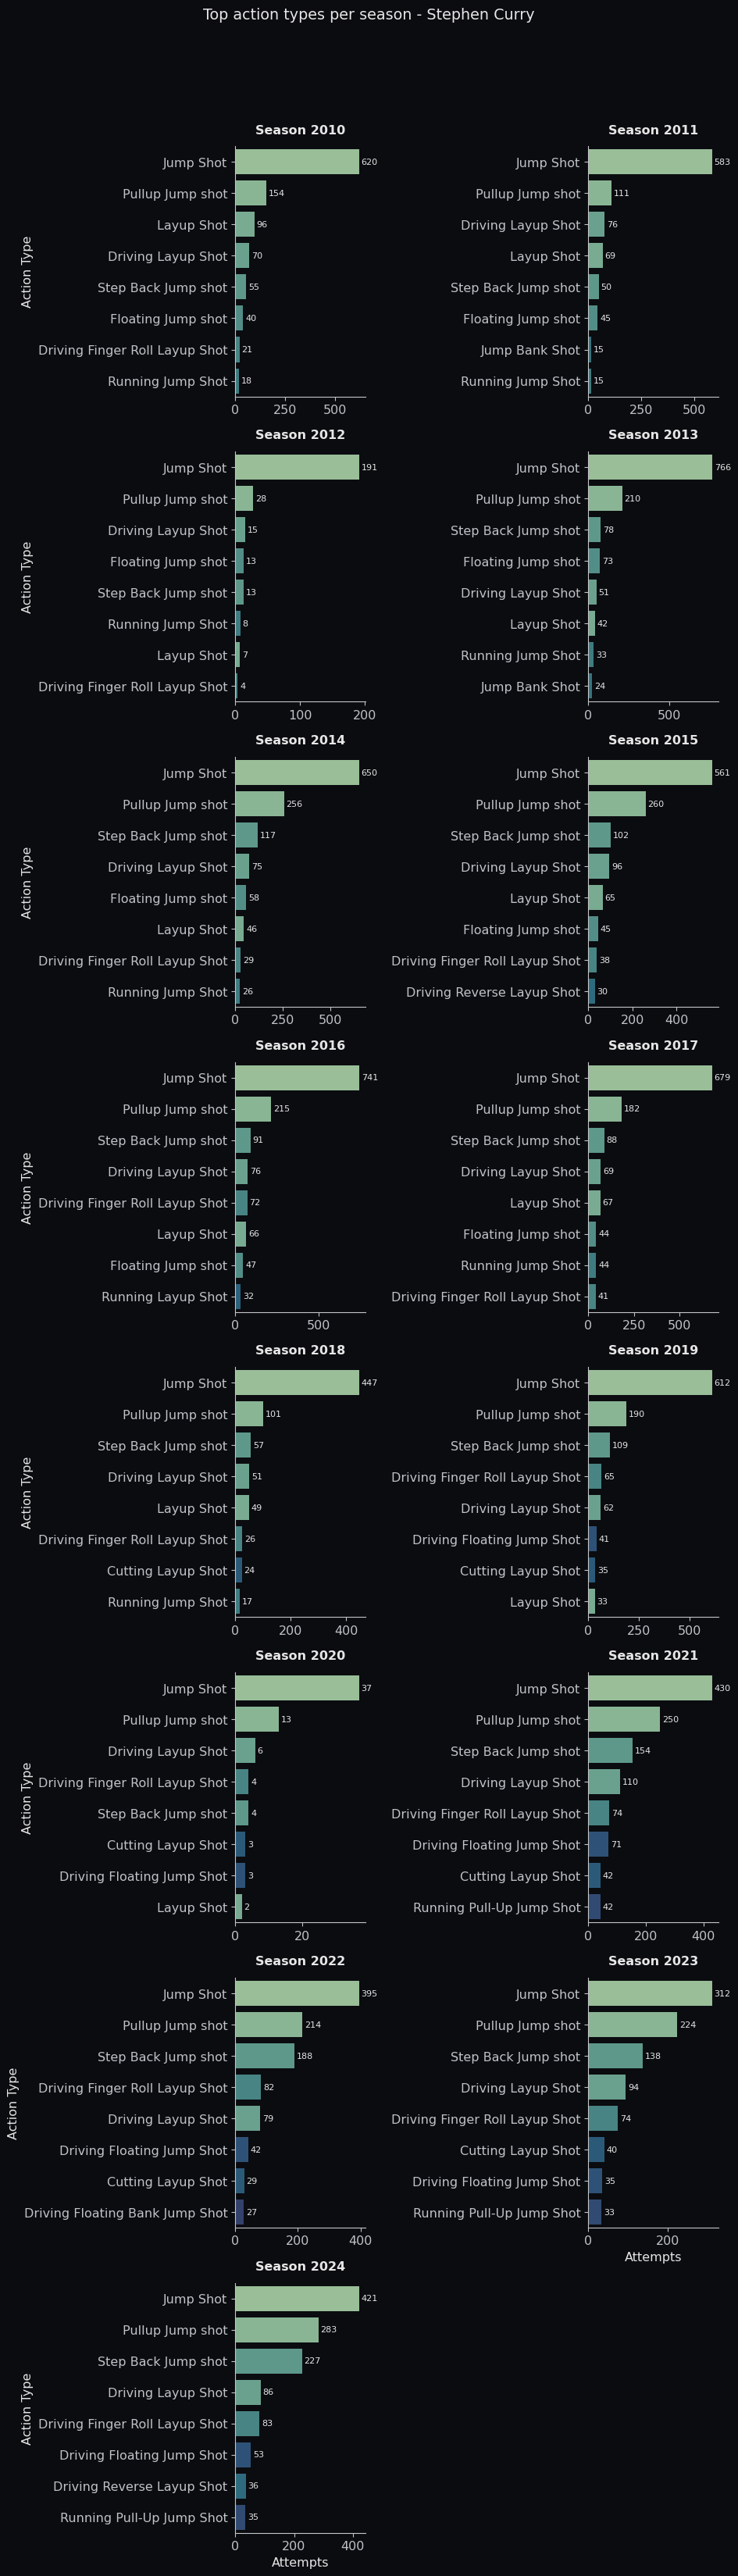

/var/folders/w4/pkr6vk056pn38g4cqk9pjkh00000gn/T/ipykernel_98613/2152293255.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


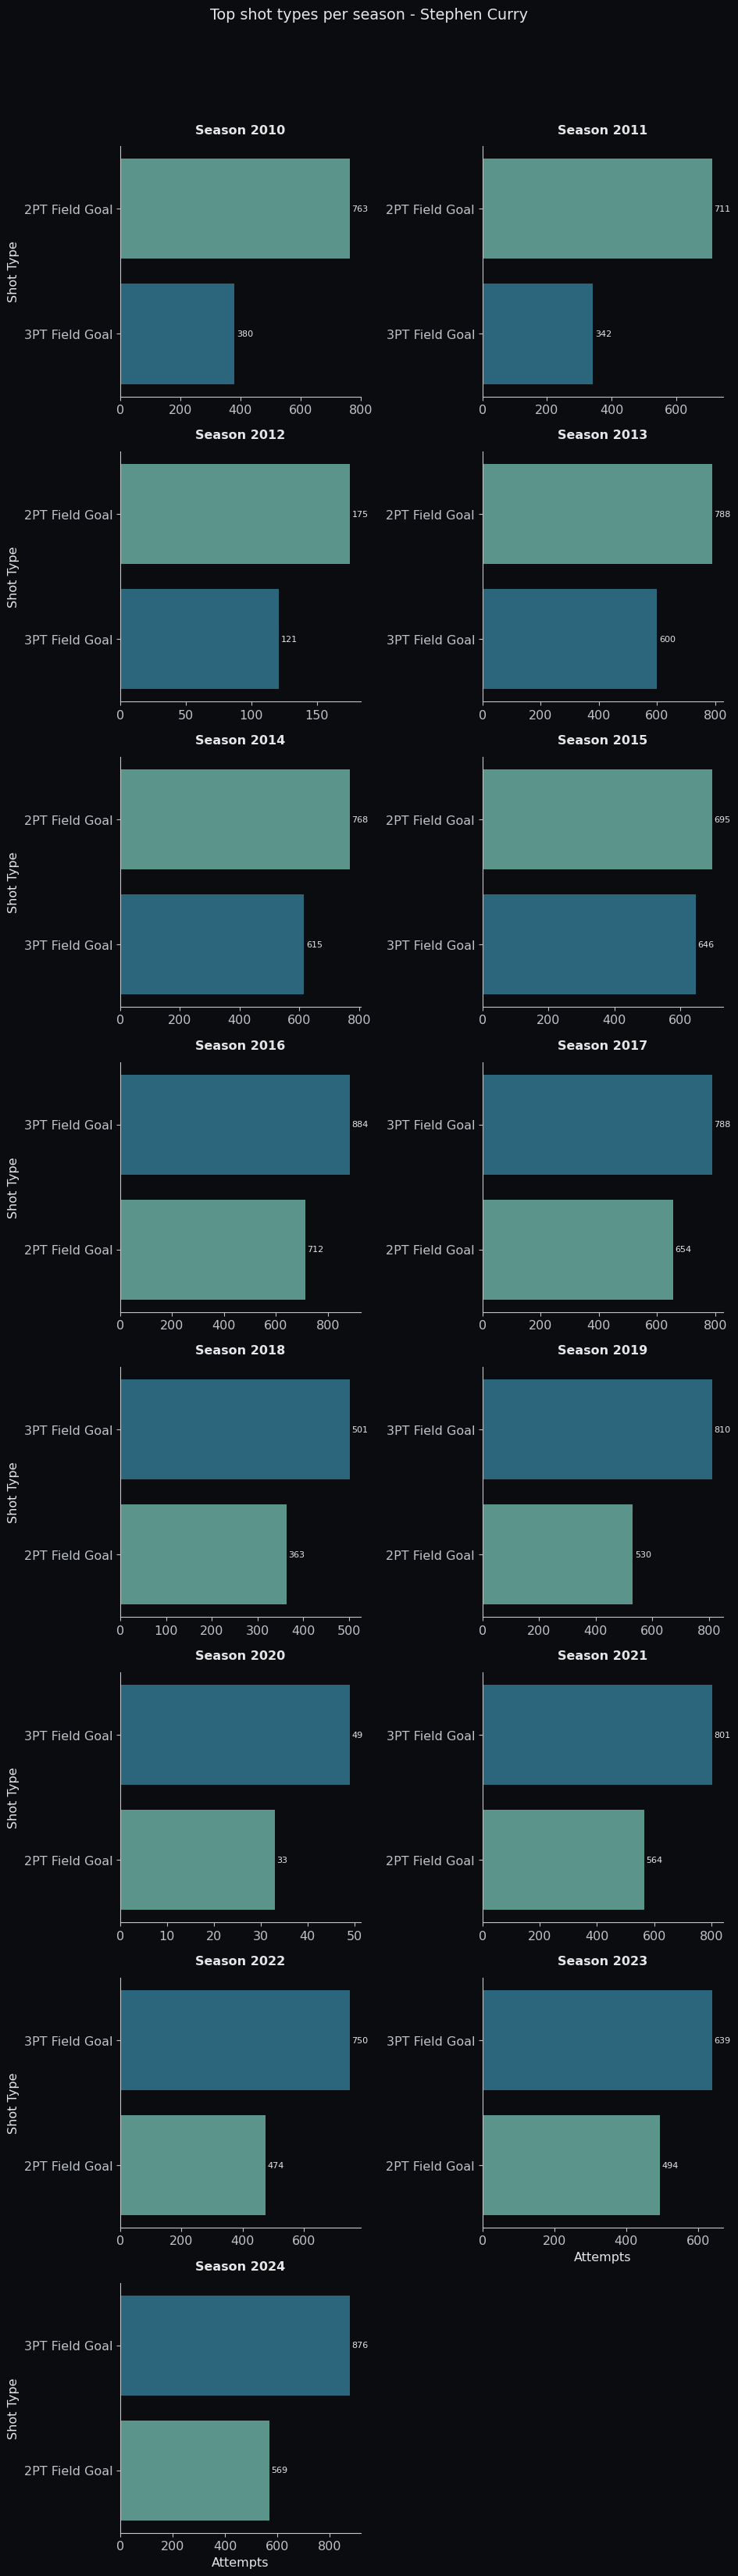

In [8]:
print("Action type attempts (top 20 rows):")
display(action_counts.head(20))
print("Shot type attempts (top 20 rows):")
display(shot_counts.head(20))


def plot_top_counts(df_counts, label_col, title, top_n=8):
    df_top = (
        df_counts.sort_values(["YEAR", "ATTEMPTS"], ascending=[True, False])
        .groupby("YEAR")
        .head(top_n)
    )
    g = sns.catplot(
        data=df_top,
        x="ATTEMPTS",
        y=label_col,
        col="YEAR",
        kind="bar",
        col_wrap=2,
        height=4,
        aspect=1.2,
        sharex=False,
        sharey=False,
        palette="crest",
    )
    g.set_titles("Season {col_name}")
    g.set_axis_labels("Attempts", label_col.replace("_", " ").title())
    g.fig.suptitle(title, y=1.03)
    for ax in g.axes.flatten():
        for c in ax.containers:
            ax.bar_label(c, fmt="%.0f", padding=2, fontsize=8)
    plt.tight_layout()
    plt.show()

plot_top_counts(action_counts, "ACTION_TYPE", f"Top action types per season - {player}")
plot_top_counts(shot_counts, "SHOT_TYPE", f"Top shot types per season - {player}")


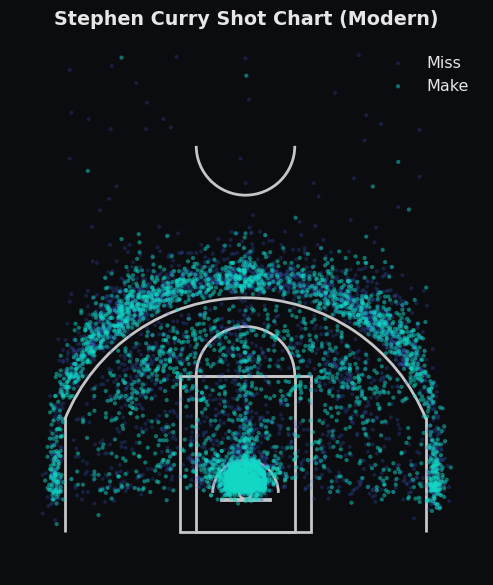

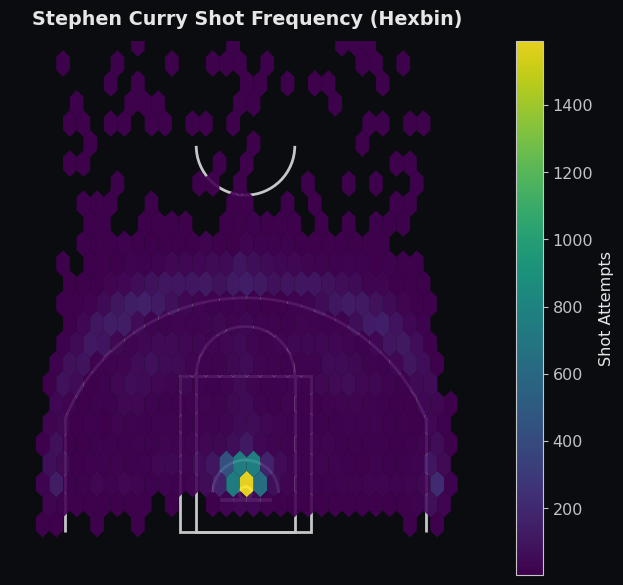

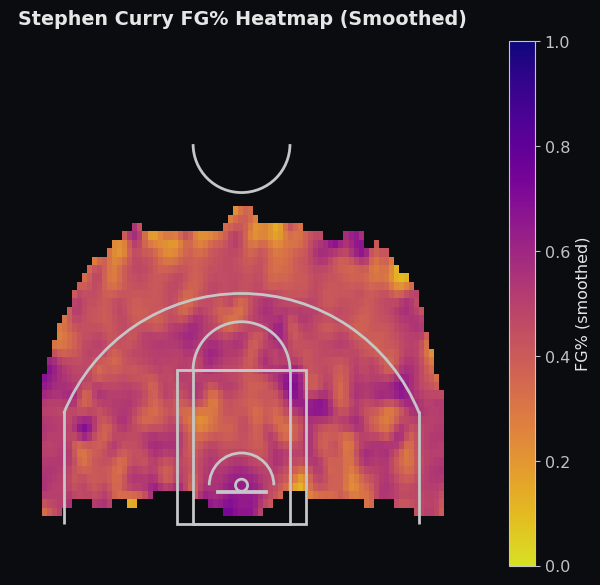

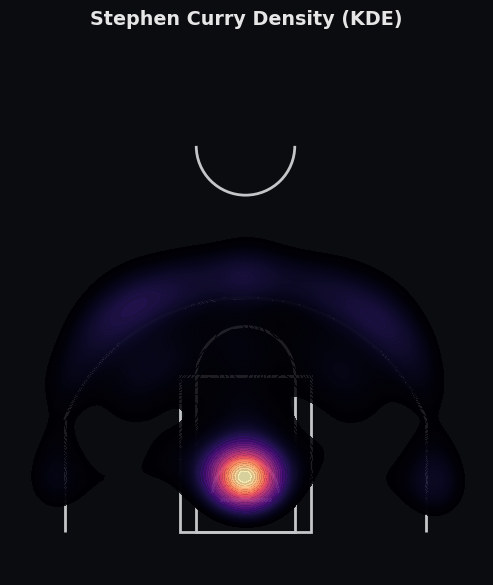


Season 2010: 1143 shots


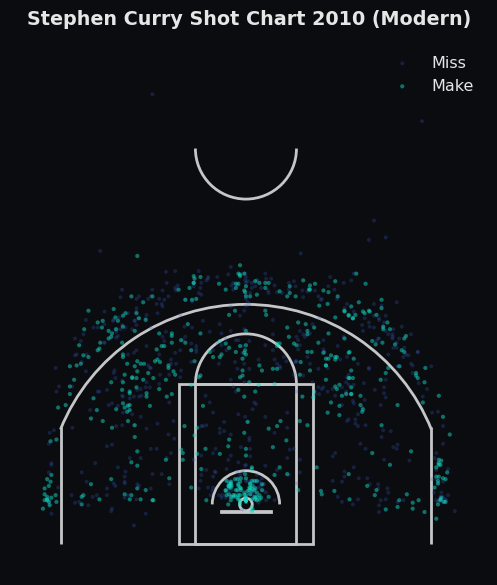

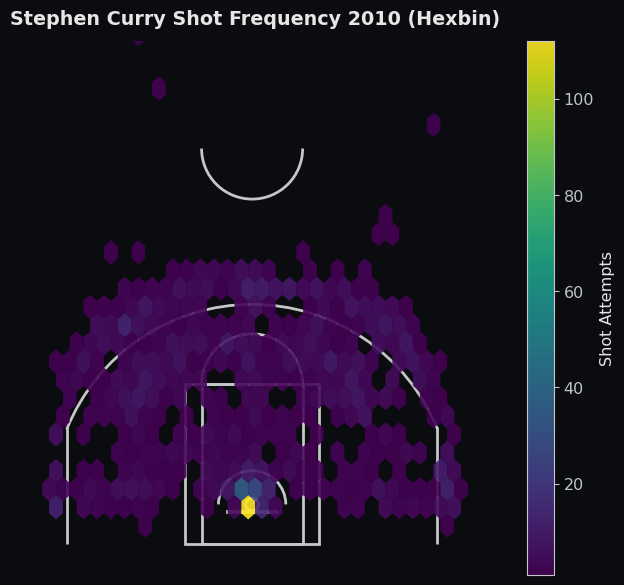

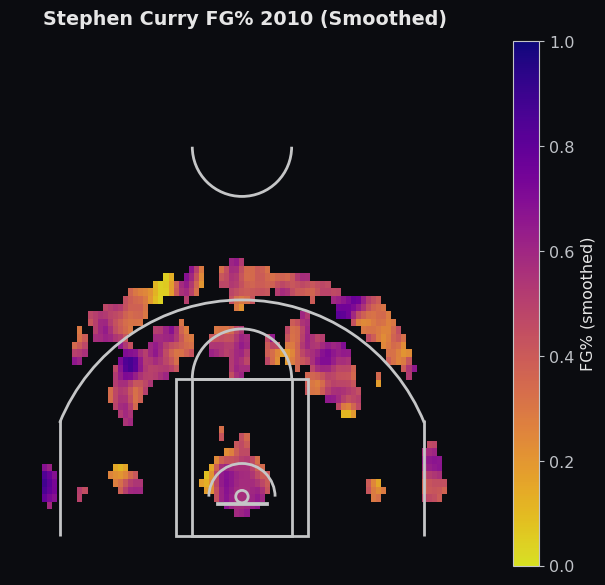

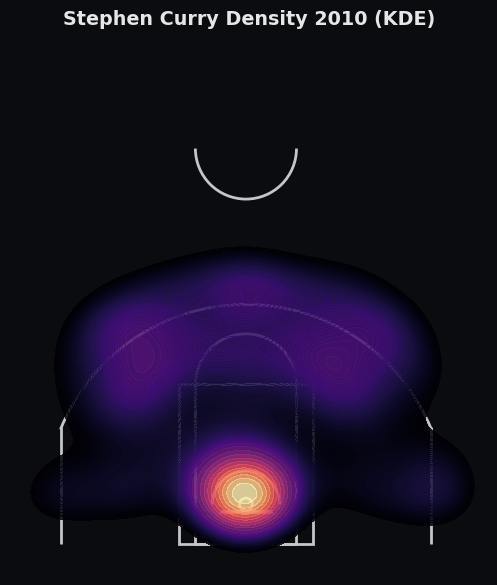


Season 2011: 1053 shots


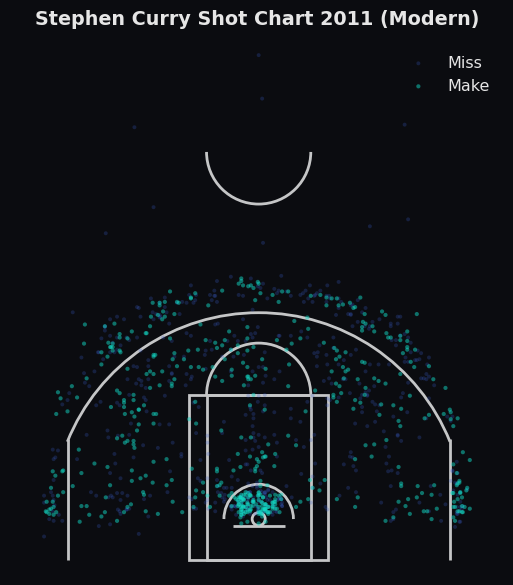

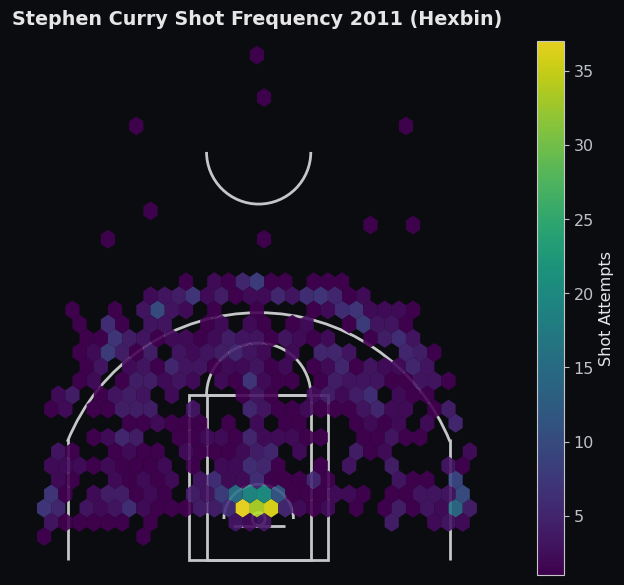

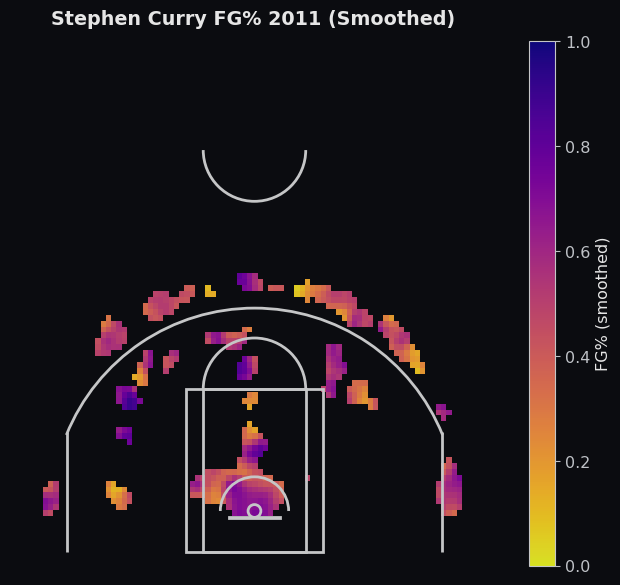

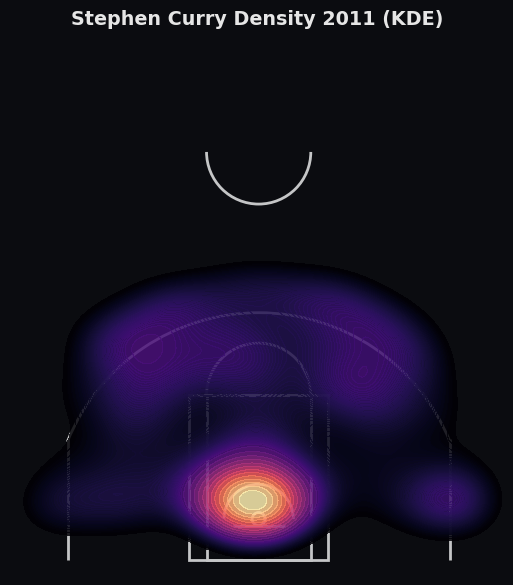


Season 2012: 296 shots


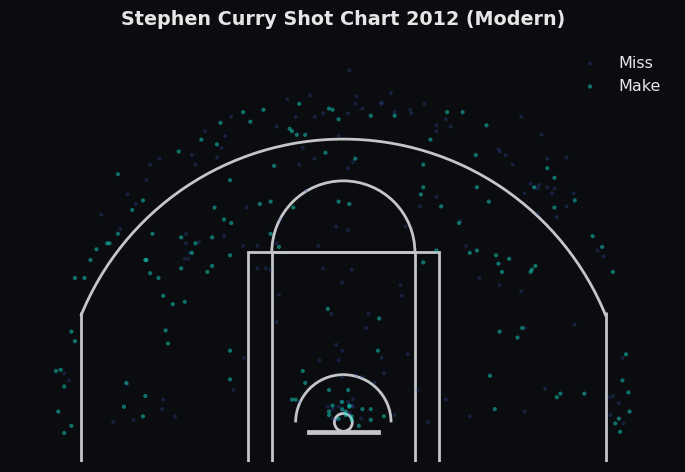

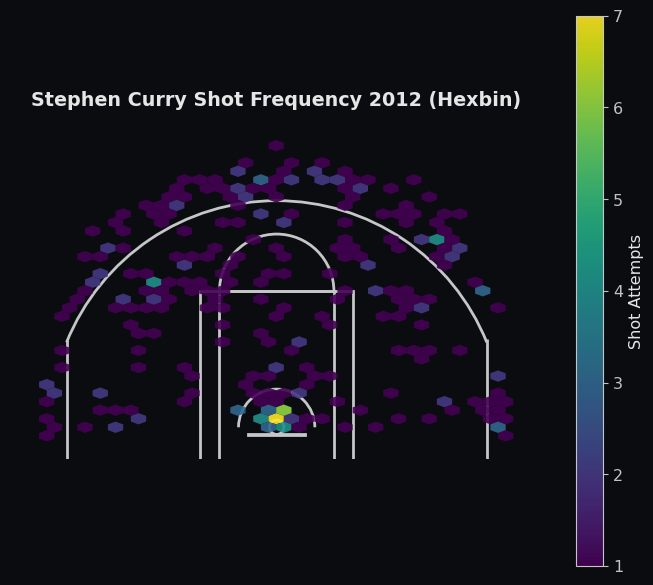

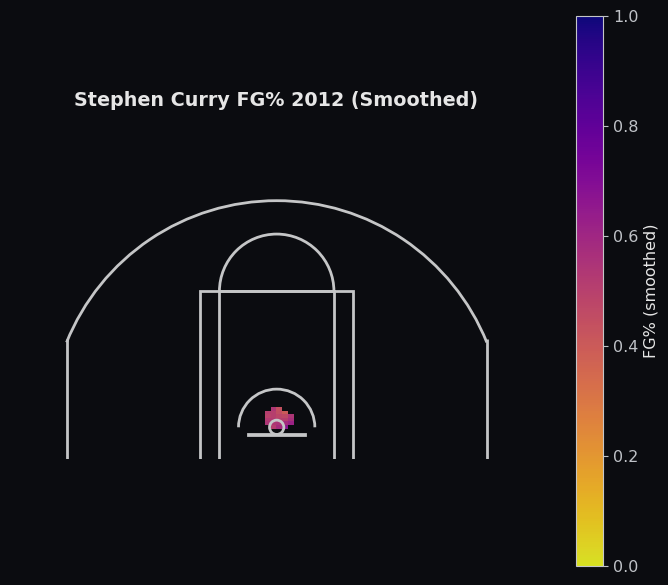

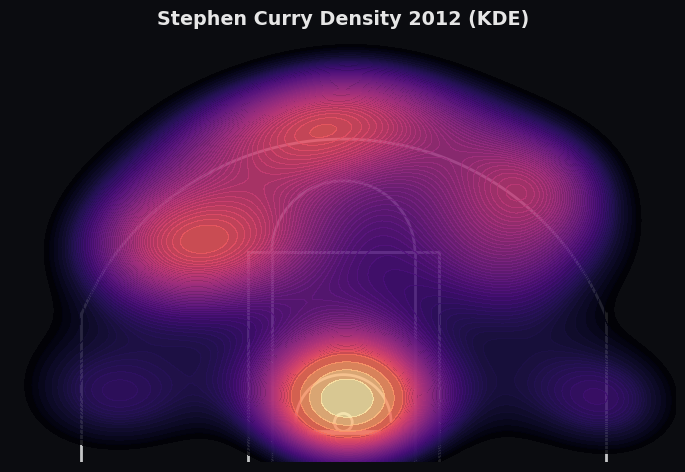


Season 2013: 1388 shots


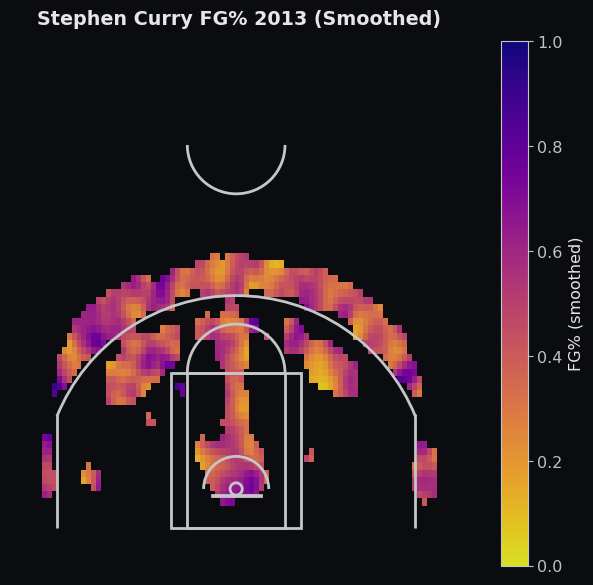

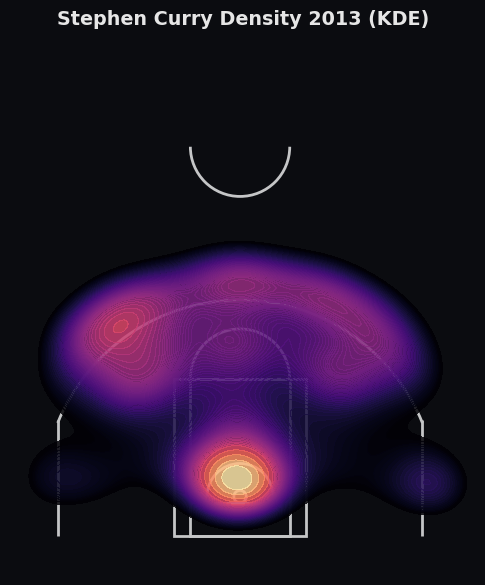


Season 2014: 1383 shots


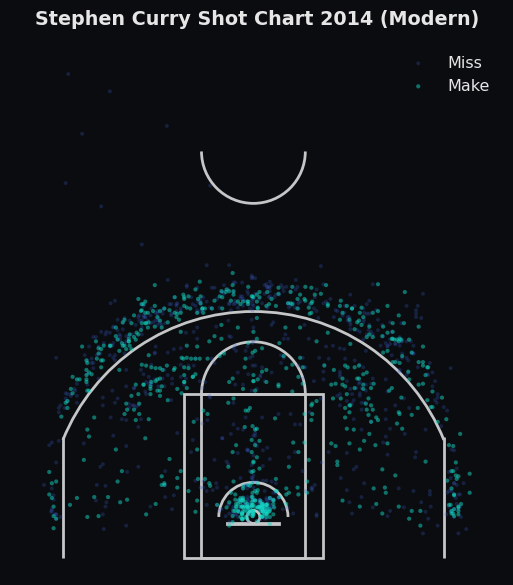

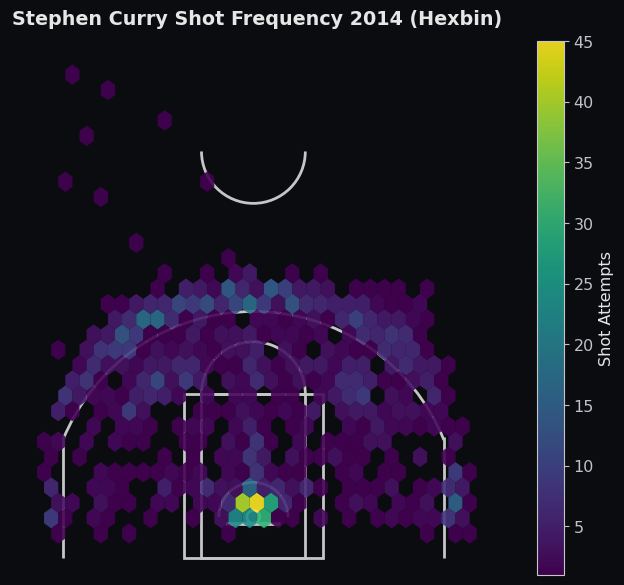

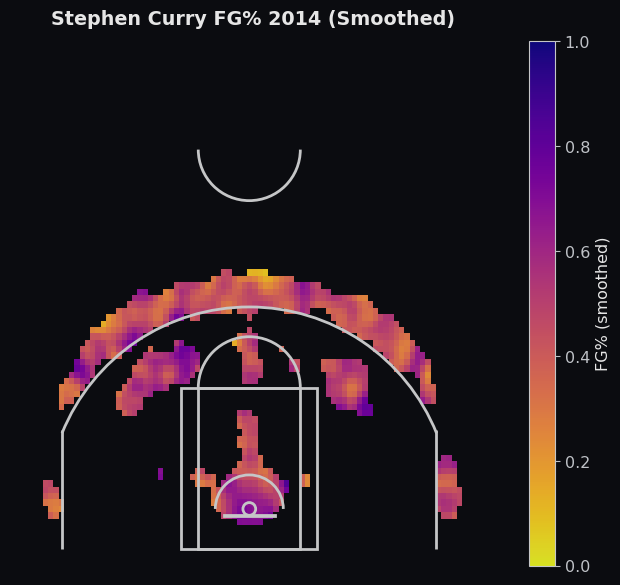

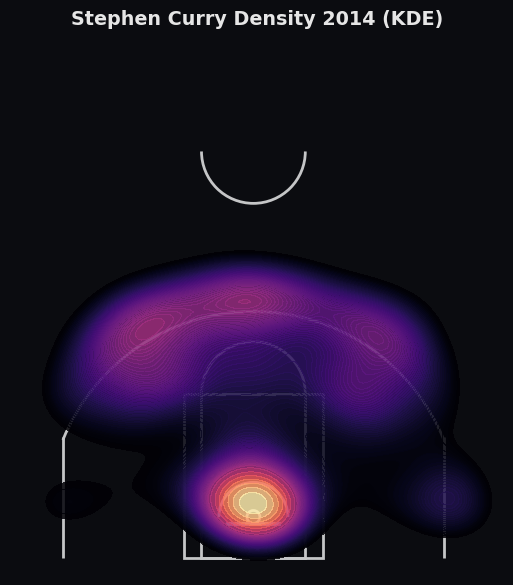


Season 2015: 1341 shots


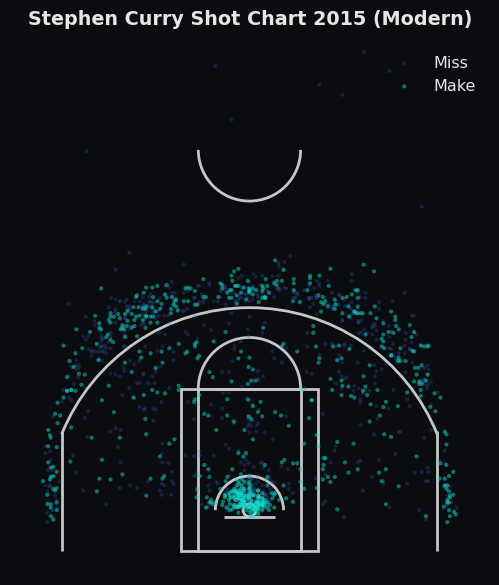

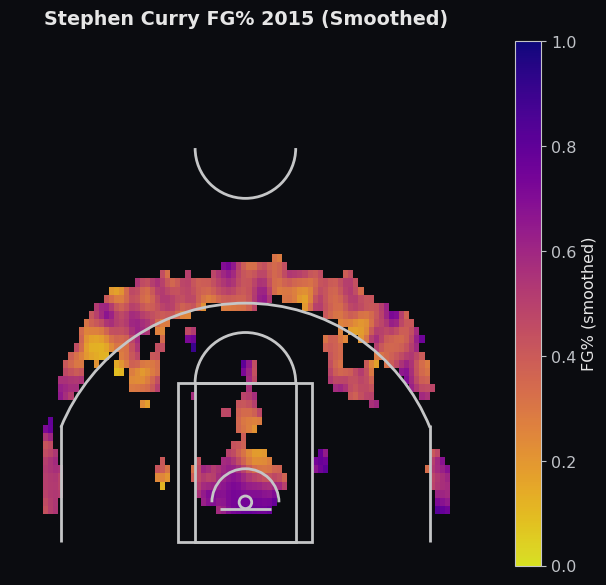

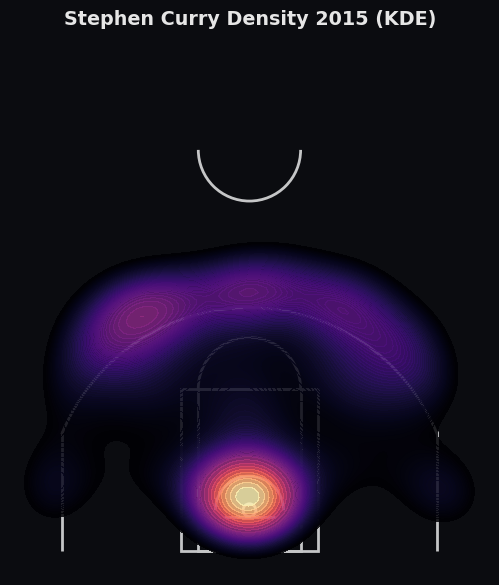


Season 2016: 1596 shots


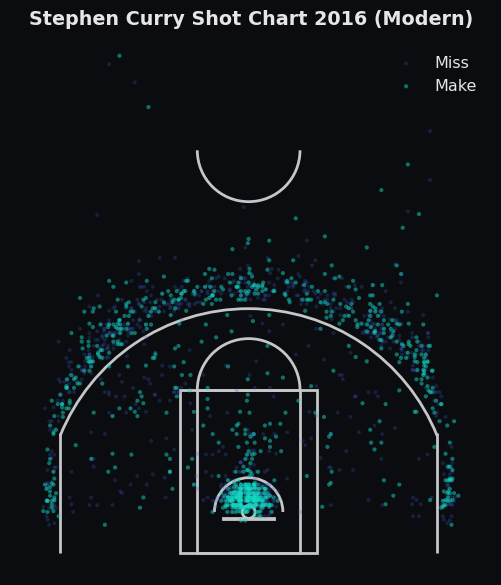

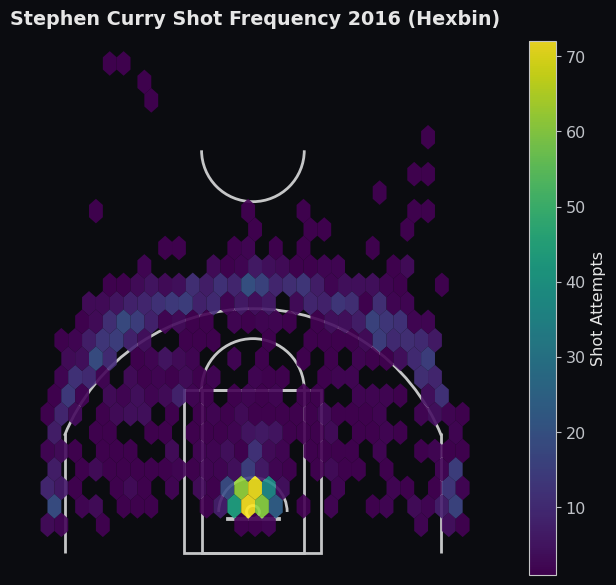

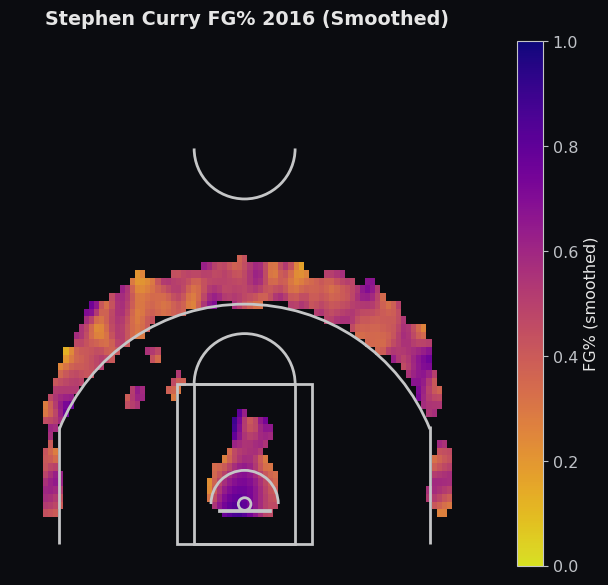

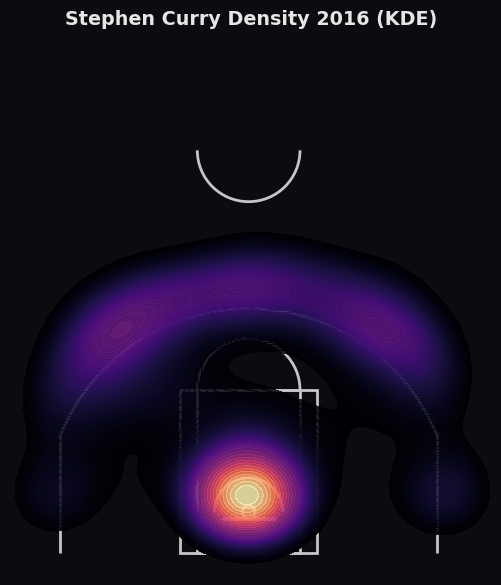


Season 2017: 1442 shots


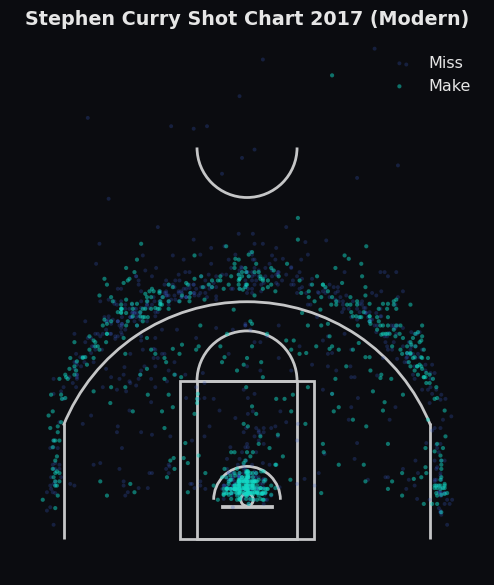

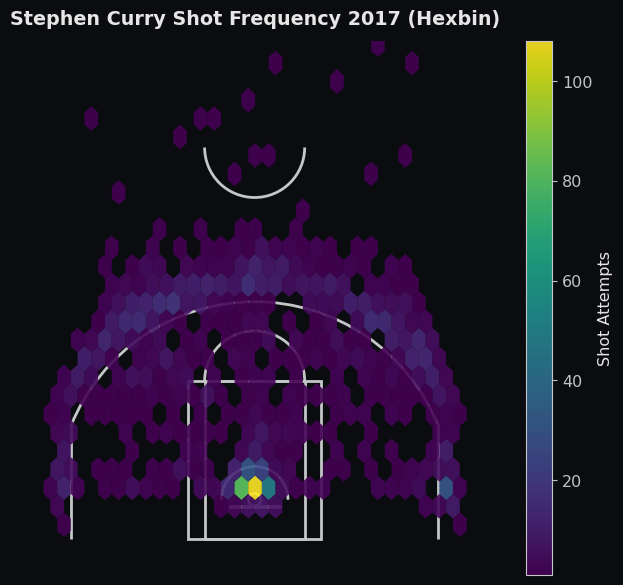

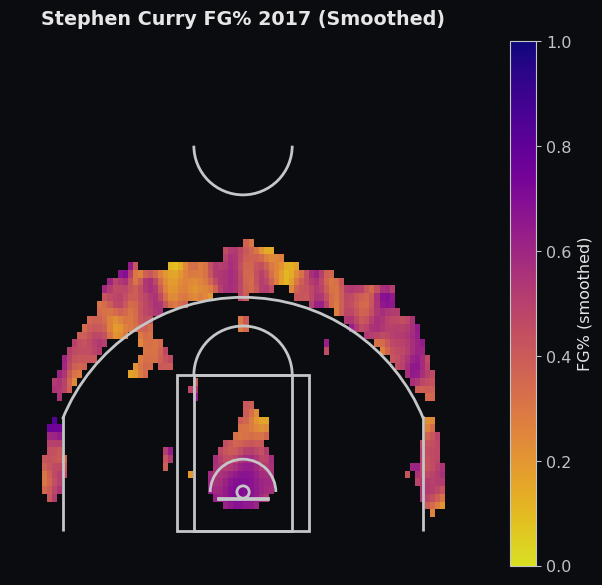

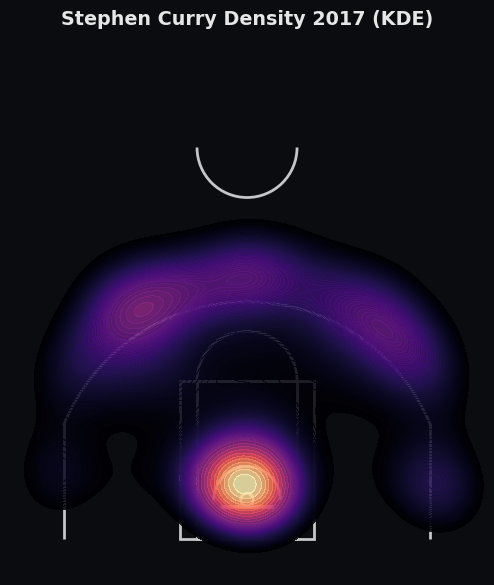


Season 2018: 864 shots


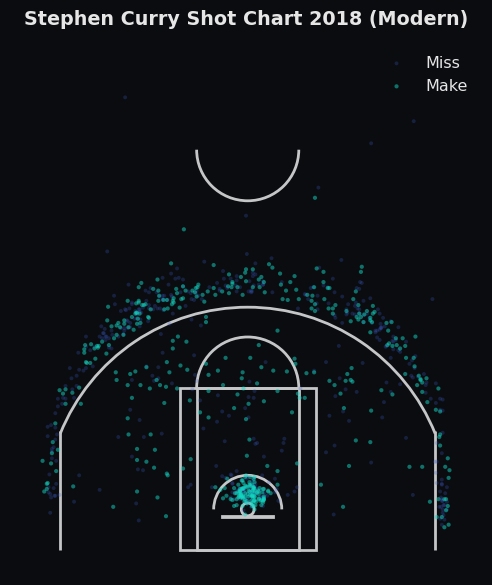

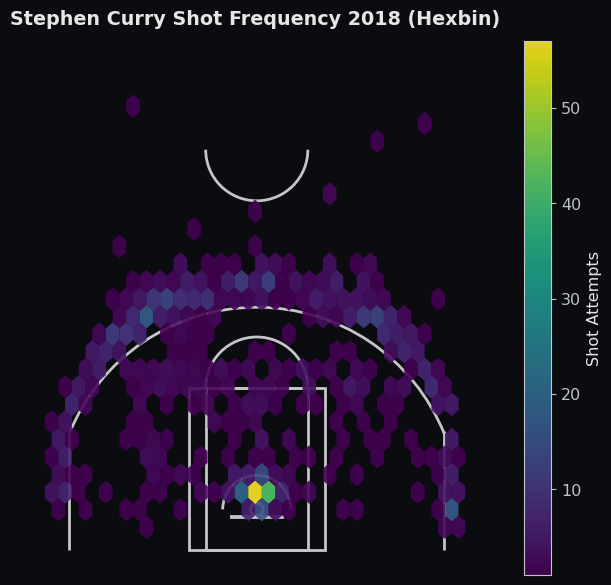

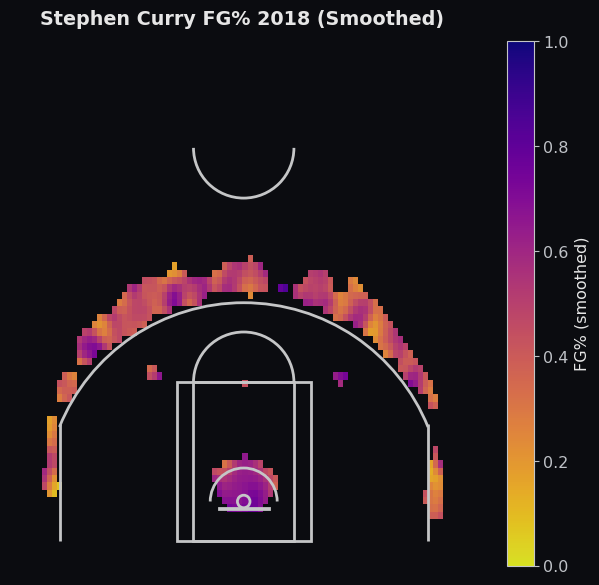

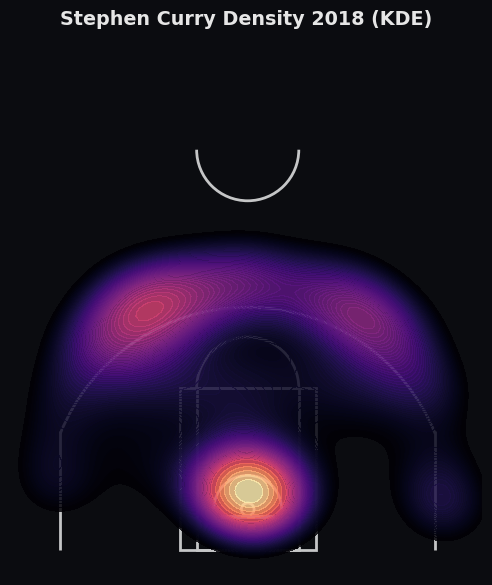


Season 2019: 1340 shots


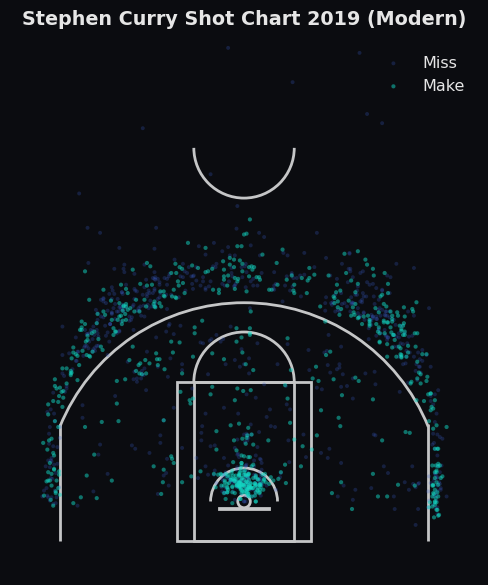

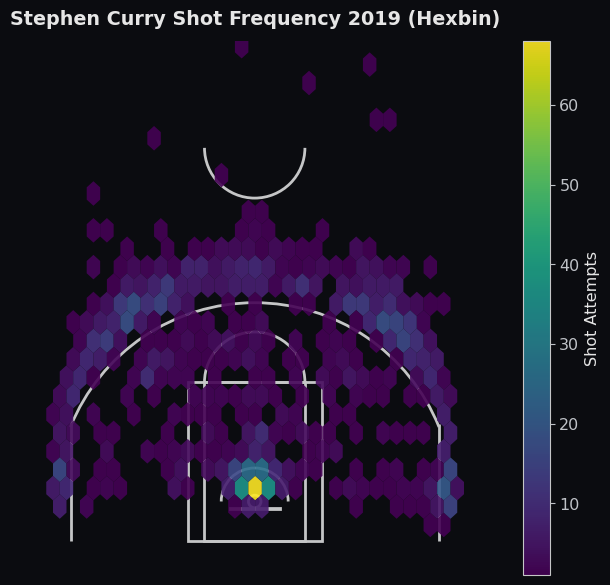

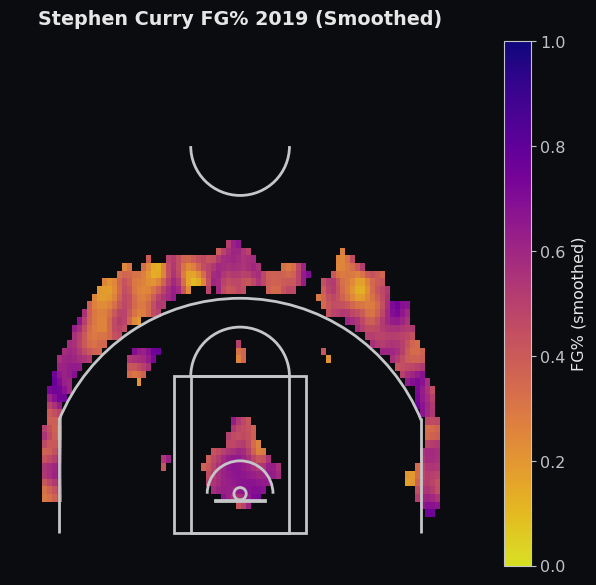

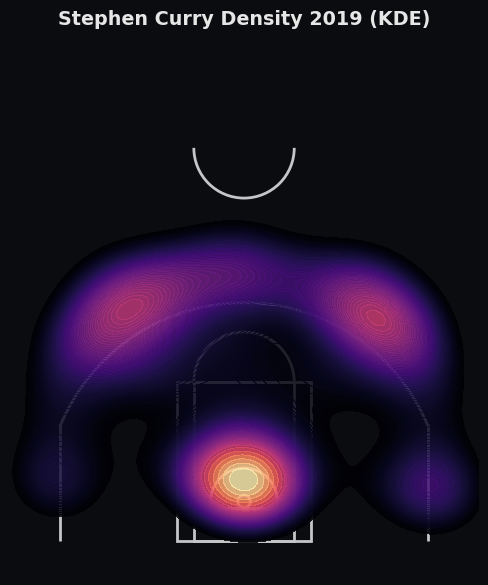


Season 2020: 82 shots


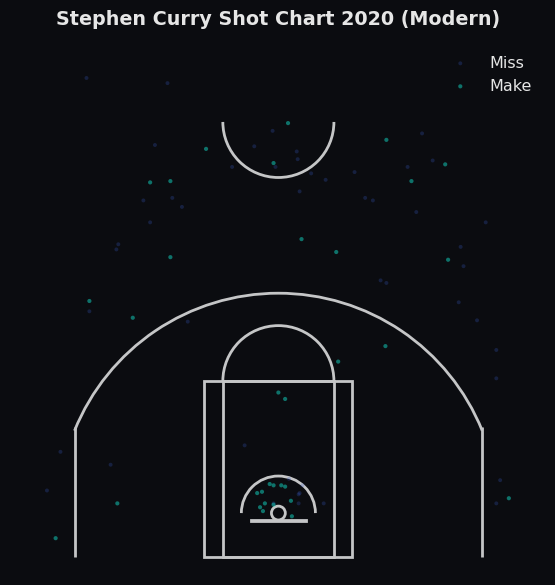

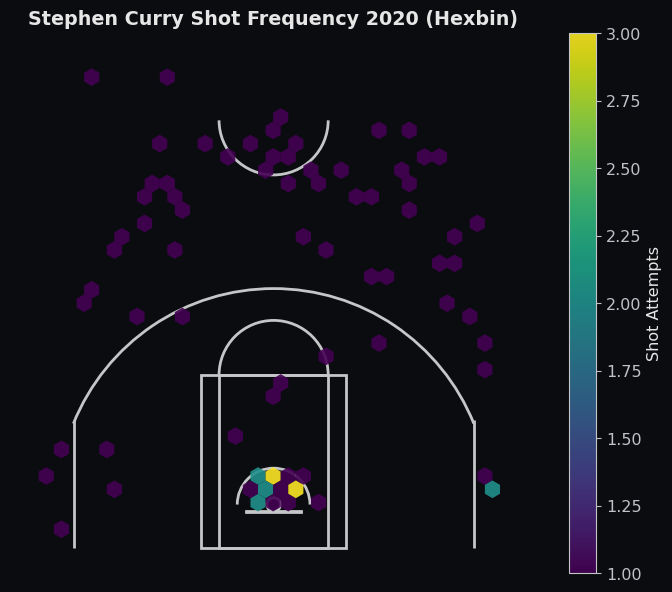

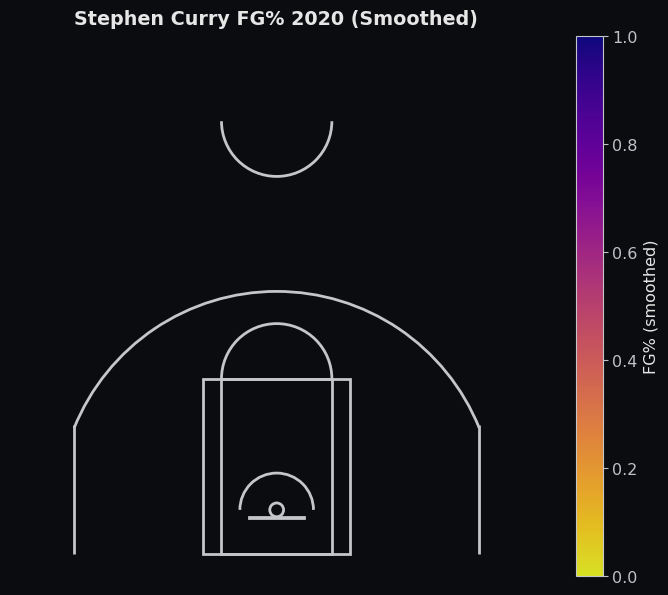

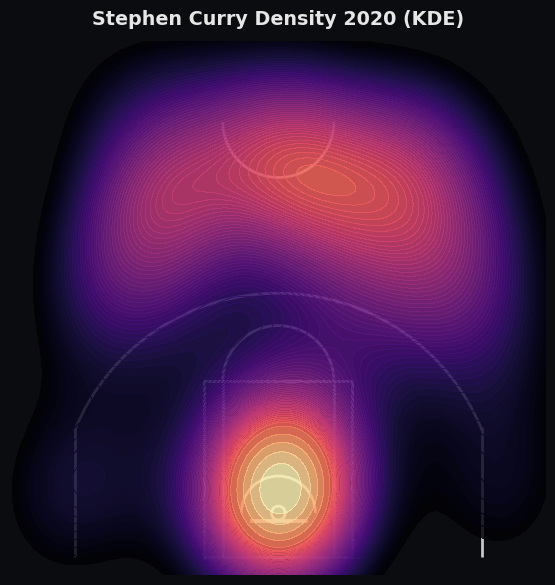


Season 2021: 1365 shots


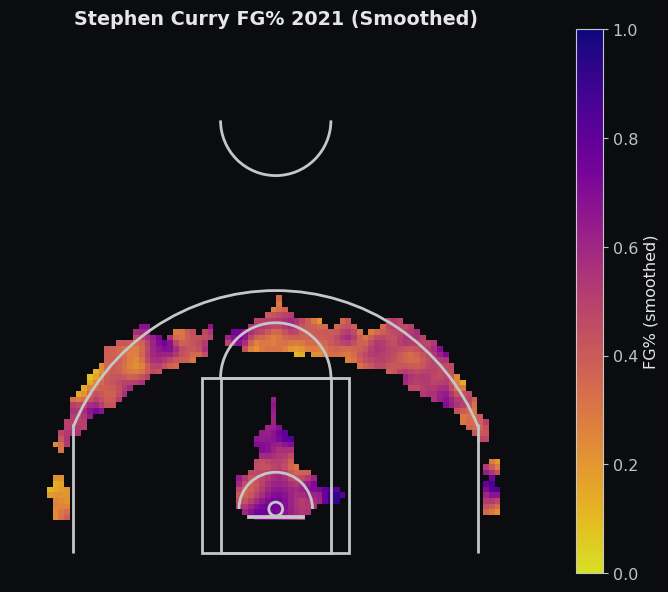

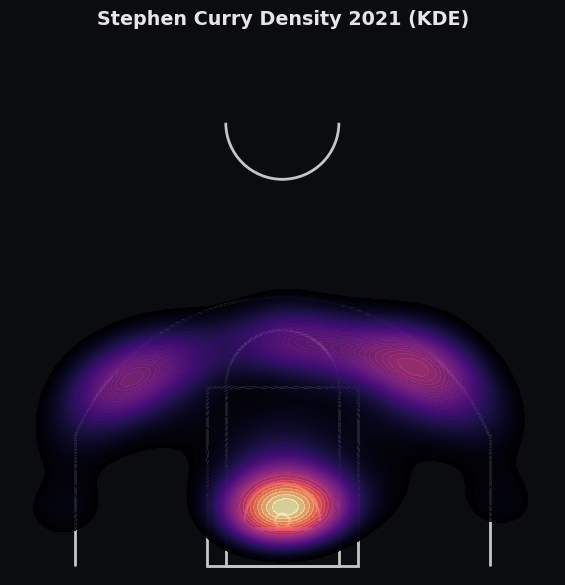


Season 2022: 1224 shots


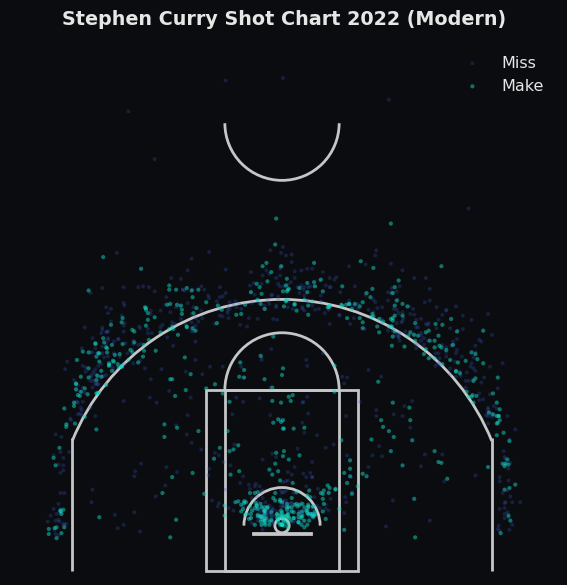

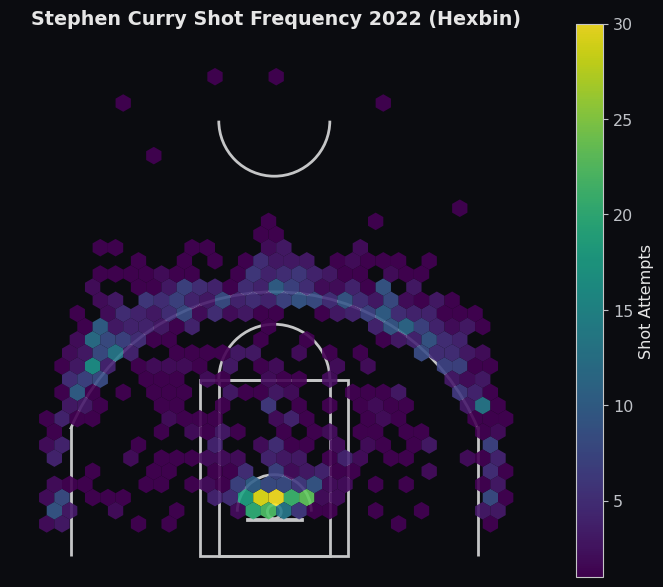

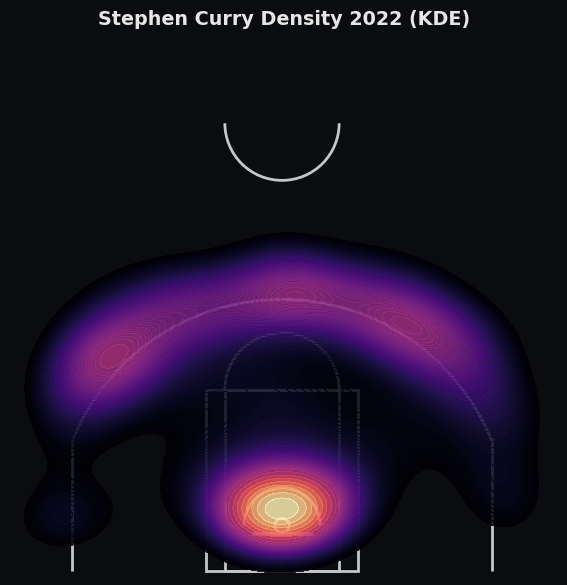


Season 2023: 1133 shots


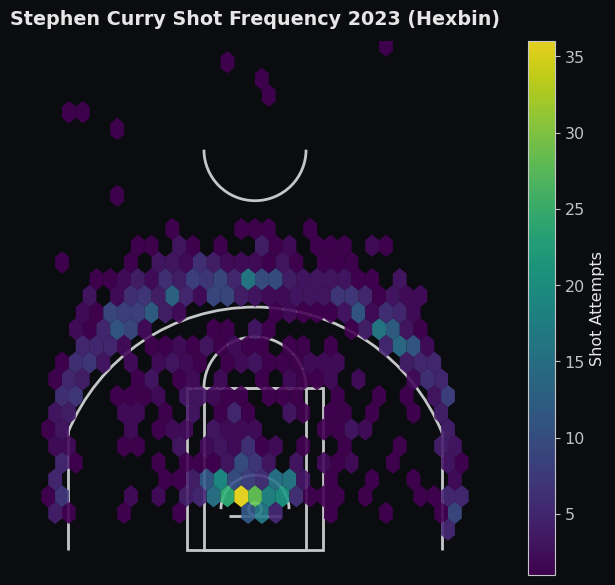

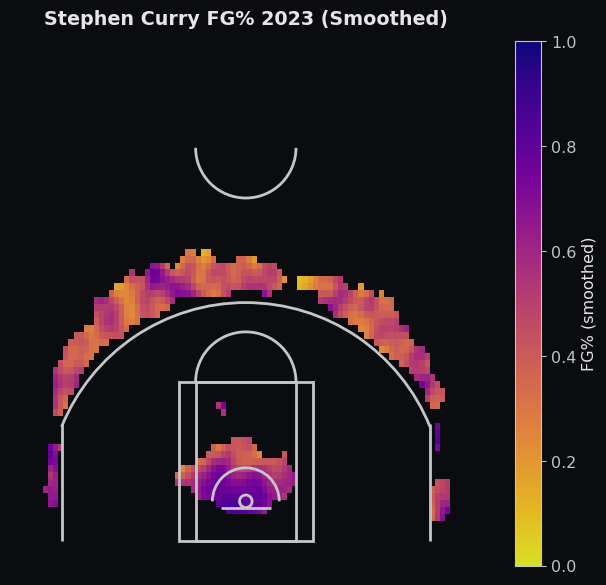

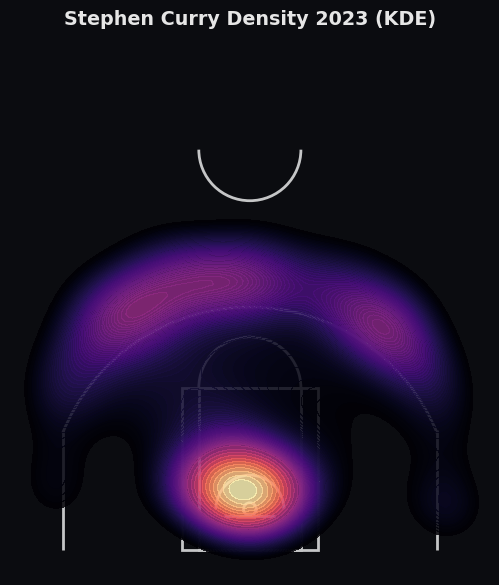


Season 2024: 1445 shots


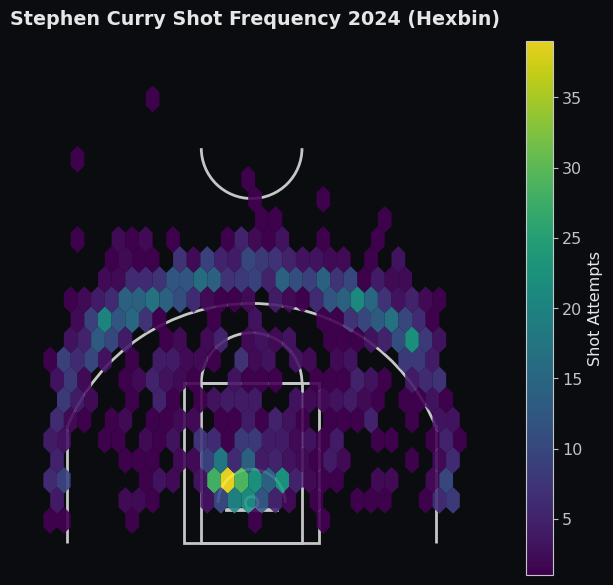

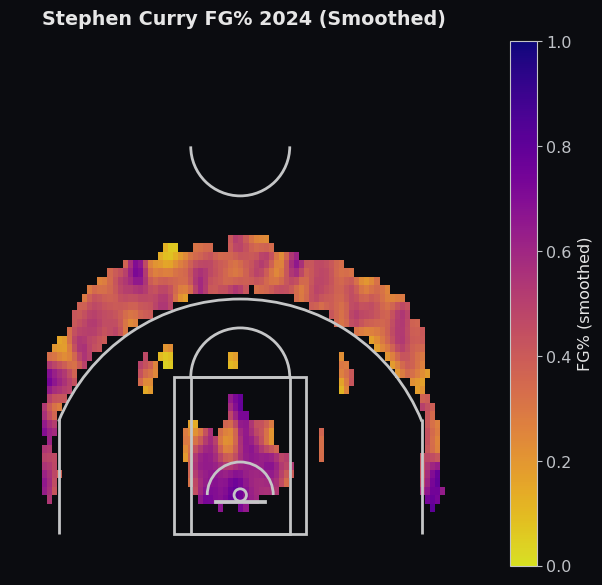

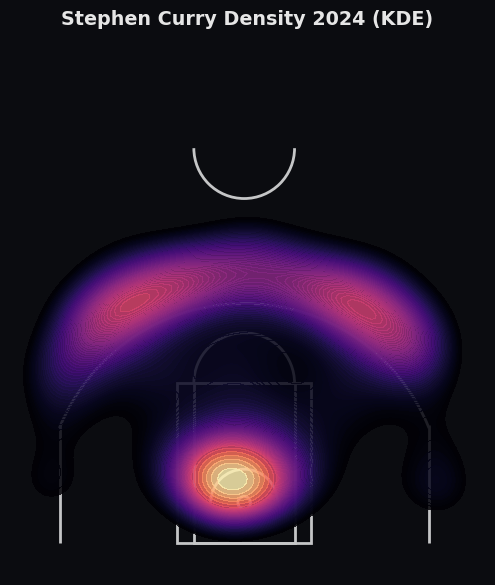

In [9]:
# modern aggregate visuals across selected seasons
plot_shot_chart_modern(df_p, title=f"{player} Shot Chart (Modern)", units="feet")
plot_hexbin_frequency(df_p, title=f"{player} Shot Frequency (Hexbin)", units="feet")
plot_fg_prob_kde_modern(df_p, title=f"{player} FG% Heatmap (Smoothed)", bins=80, sigma=1.2, min_attempts=0.5, units="feet")
plot_kde_heatmap_modern(df_p, title=f"{player} Density (KDE)", units="feet")

# per-season shot visuals
seasons_to_plot = available_years_for_player or sorted(df_p["YEAR"].unique())
for y in seasons_to_plot:
    df_y = df_p[df_p["YEAR"] == y]
    if df_y.empty:
        continue
    print(f"\nSeason {y}: {len(df_y)} shots")
    plot_shot_chart_modern(df_y, title=f"{player} Shot Chart {y} (Modern)", units="feet")
    plot_hexbin_frequency(df_y, title=f"{player} Shot Frequency {y} (Hexbin)", units="feet")
    plot_fg_prob_kde_modern(df_y, title=f"{player} FG% {y} (Smoothed)", bins=80, sigma=1.2, min_attempts=0.5, units="feet")
    plot_kde_heatmap_modern(df_y, title=f"{player} Density {y} (KDE)", units="feet")
